## Perform sentimental analysis on the Elon-musk tweets

In [1]:
# importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'/Users/ag/Downloads/Elon_musk.csv', encoding = "ISO-8859-1")

## EDA

In [3]:
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
df.shape

(1999, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [8]:
ps = PorterStemmer()

In [9]:
lemmatizer = WordNetLemmatizer()

In [10]:
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [11]:
corpus

['kunalb alien',
 'id aa carmack ray trace cyberpunk hdr next level tri',
 'joerogan spotifi great interview',
 'gtera doge underestim',
 'teslacn congratul tesla china amaz execut last year next even',
 'happi new year ox http co wfkmyu oj',
 'frodo underdog thought would fail http co zgxjfdzzrm',
 'owenspark flcnhvi anonyx haha thank',
 'flcnhvi anonyx inde tweet definit repres real world time alloc',
 'entertain outcom like',
 'givedirectli sent',
 'agre clubhous kanyewest',
 'http co rwe uhst',
 'geoffkeighley unrealengin get real',
 'bought dogecoin lil x toddler hodler',
 'joshmanmod definit issu sentenc seem bit high',
 'freewalletorg thank fix',
 'freewalletorg plea unlock account',
 'astrojordi u f u f',
 'true power haha http co fc uhqsd',
 'freewalletorg crypto wallet give privat key avoid cost',
 'freewalletorg app suck',
 'rt spacex nasa select falcon heavi launch first two element lunar gateway togeth one mission http co pwt',
 'ajtourvil ye',
 'blkmdl rationaletienn adam

In [12]:
from textblob import TextBlob

In [13]:
def getsubjectivity(corpus):
    return TextBlob(corpus).sentiment.subjectivity

def getploarity(corpus):
    return TextBlob(corpus).sentiment.polarity


df['subjectivity'] = df['Text'].apply(getsubjectivity)
df['polarity'] = df['Text'].apply(getploarity)

In [14]:
df

,Unnamed: 0,Text,subjectivity,polarity
0,1,@kunalb11 Im an alien,0.750000,-0.250000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0.000000,0.000000
2,3,@joerogan @Spotify Great interview!,0.750000,1.000000
3,4,@gtera27 Doge is underestimated,0.000000,0.000000
4,5,@teslacn Congratulations Tesla China for amazi...,0.366667,0.345313
...,...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",0.508333,0.111111
1995,1996,@PPathole Make sure to read ur terms &amp; con...,0.888889,0.625000
1996,1997,@TeslaGong @PPathole Samwise Gamgee,0.000000,0.000000
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,0.500000,-0.375000


In [15]:
def get_sentiment(score):
    if score <= 0:
        return 'Negative'
    else:
        return 'Positive'
    
df['get_sentiment'] = df['polarity'].apply(get_sentiment)

In [16]:
df['get_sentiment'].value_counts()

Negative    1116
Positive     883
Name: get_sentiment, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='get_sentiment', ylabel='count'>

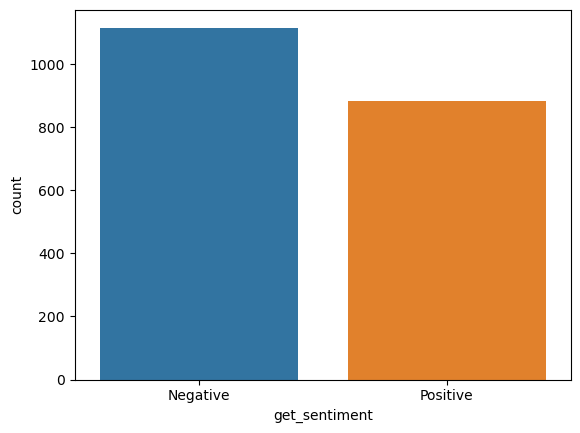

In [17]:
import seaborn as sns
sns.countplot(df['get_sentiment'])

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
vectorizer = CountVectorizer()

In [20]:
cv = vectorizer.fit_transform(corpus)

In [24]:
len(cv.toarray())

1999

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
vect = TfidfVectorizer()

In [29]:
vect = vect.fit_transform(corpus)

In [30]:
len(vect.toarray())

1999